In [8]:
import numpy as np
import emcee
import zeus
import corner
import matplotlib.pyplot as plt
from IPython.display import display, Math

In [2]:
# Setting the problem

def log_prob(x, mu, cov):
    diff = x - mu
    return -0.5 * np.dot(diff, np.linalg.solve(cov, diff))

ndim = 5

np.random.seed(42)
means = np.random.rand(ndim)

cov = 0.5 - np.random.rand(ndim**2).reshape((ndim, ndim))
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov, cov)

nwalkers = 32
p0 = np.random.rand(nwalkers, ndim)

labels = ["x1", "x2", "x3", "x4", "x5"]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

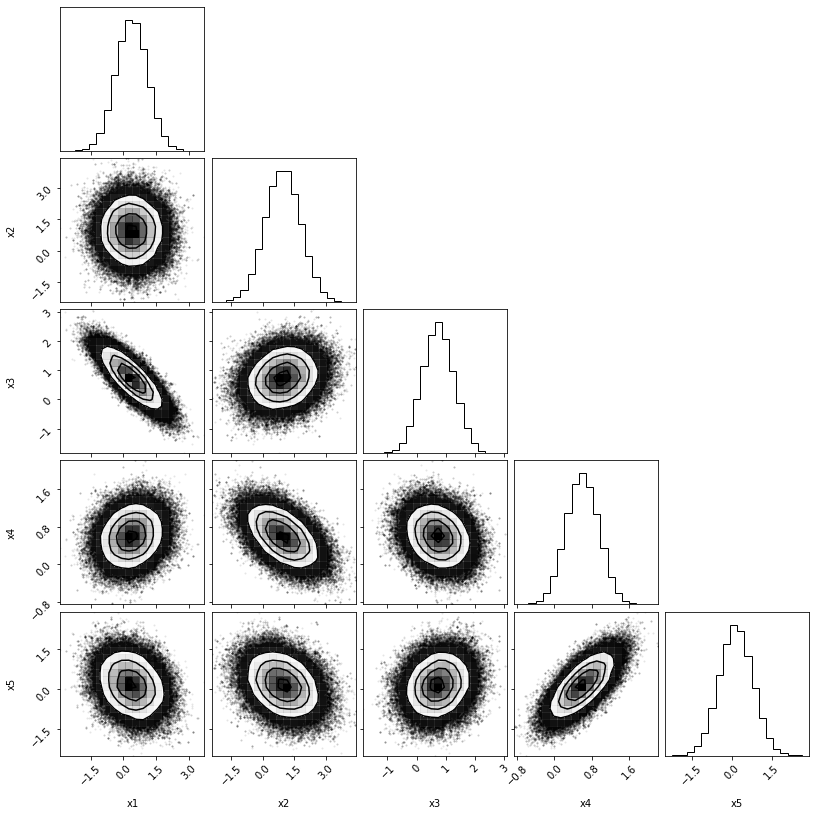

In [9]:
# emcee

esampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[means, cov])

estate = esampler.run_mcmc(p0, 100)
esampler.reset()

esampler.run_mcmc(estate, 10000)

esamples = esampler.get_chain(flat=True)
fig1 = corner.corner(esamples, labels=labels)

for i in range(ndim):
    mcmc = np.percentile(esamples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

Initialising ensemble of 32 walkers...
Sampling progress : 100%|██████████| 100/100 [00:00<00:00, 126.29it/s]
Initialising ensemble of 32 walkers...
Sampling progress : 100%|██████████| 10000/10000 [01:16<00:00, 130.24it/s]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

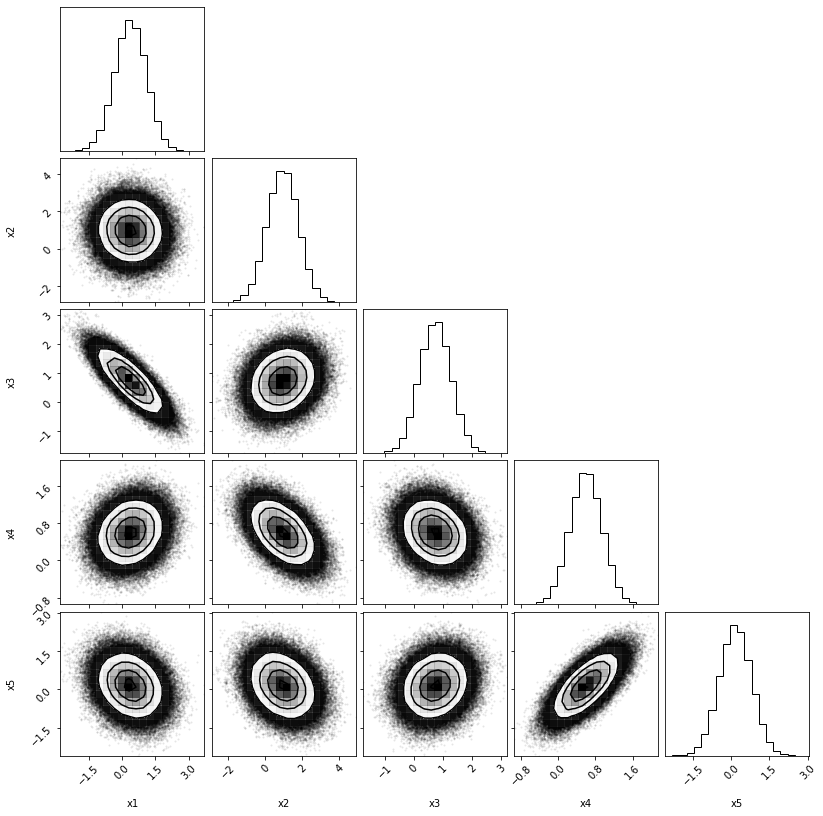

In [10]:
# zeus

zsampler = zeus.EnsembleSampler(nwalkers, ndim, log_prob, args=[means, cov])

zstate = zsampler.run_mcmc(p0, 100)
zsampler.reset()

zsampler.run_mcmc(zstate, 10000)

zsamples = zsampler.get_chain(flat=True)
fig2 = corner.corner(zsamples, labels=labels)

for i in range(ndim):
    mcmc = np.percentile(zsamples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))
